## Look at some very high-resolution SAR images from Umbra open data

In [19]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import Normalize
from PIL import Image
import numpy as np
import glob
import pandas as pd
import seaborn as sns

# Libraries for image processing and geospatial data
import rasterio
from rasterio.plot import show
from rasterio.windows import Window
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.transform import Affine, xy
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
from scipy.ndimage import rotate  # For rotating the image
from affine import Affine
from rasterio.windows import from_bounds

In [8]:
# Root dir of project
root_dir = os.path.join("/Users", "alexm", "Senior-Design")

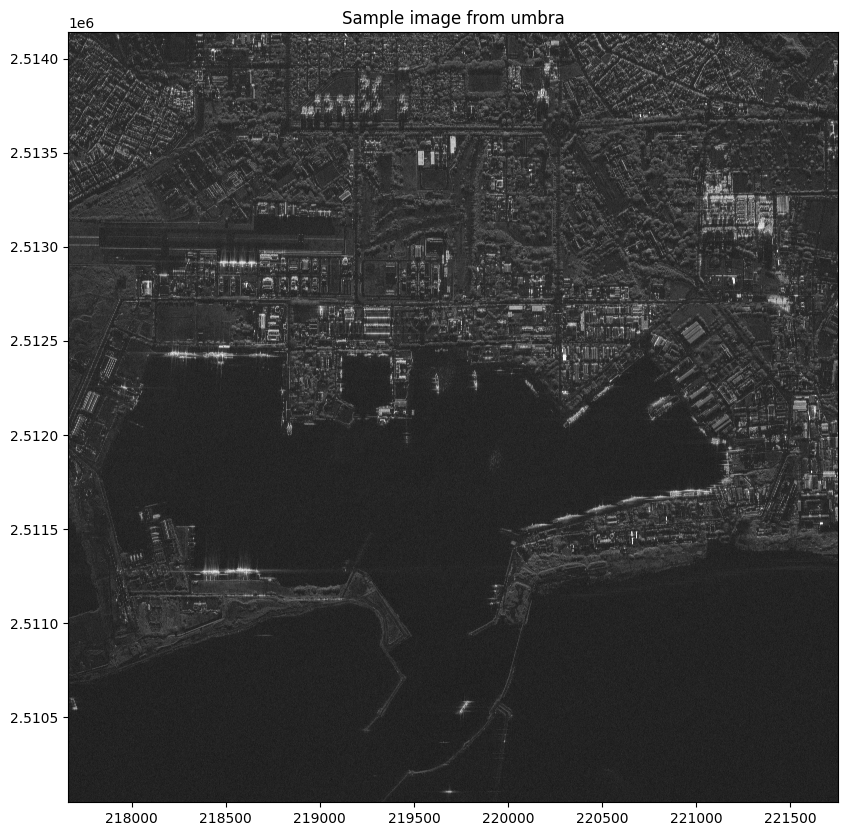

Image Bounds Info (meters): BoundingBox(left=217662.04130740536, bottom=2510048.3572470304, right=221754.12356796887, top=2514140.2365256436)
Affine Transform Info:
|-0.00,-0.21, 221754.12|
|-0.21, 0.00, 2514050.13|
| 0.00, 0.00, 1.00|


Affine(-0.004675663822355798, -0.20765761431314267, 221754.12356796887,
       -0.2076576143131501, 0.0046756638223608826, 2514050.127132459)

Width of the image: 4092.082260563504 meters,-875187 pixels
Height of the image: 4091.8792786132544 meters,-875144 pixels


In [ ]:
# View a sample tif image
sample_tif_img_path = os.path.join(root_dir, "high-res-ship-testing", "2023-04-15-01-17-53_UMBRA-05_GEC.tif")

"""with rasterio.open(sample_tif_img_path) as vv_src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(vv_src, ax=ax, cmap='gray')
    plt.title("Sample image from umbra")
    plt.show()

    img_bounds = vv_src.bounds
    print("Image Bounds Info (meters):", img_bounds)
    print("Affine Transform Info:")
    print(vv_src.transform)
    display(vv_src.transform)
    
    # Get the pixel size from the affine transform (10x10 meters in our case)
    pixel_size_x = vv_src.transform[0]  # Pixel size in the x-direction (width)
    pixel_size_y = -vv_src.transform[4]  # Pixel size in the y-direction (height)

    # Calculate the width and height in meters
    width_meters = img_bounds.right - img_bounds.left
    height_meters = img_bounds.top - img_bounds.bottom
    
    # Calculate the number of pixels
    width_pixels = int(width_meters / pixel_size_x)
    height_pixels = int(height_meters / pixel_size_y)
    
    print(f"Width of the image: {width_meters} meters,{width_pixels} pixels")
    print(f"Height of the image: {height_meters} meters,{height_pixels} pixels")"""
with rasterio.open(sample_tif_img_path) as vv_src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(vv_src, ax=ax, cmap='gray')
    plt.title("Sample image from umbra")
    plt.show()

    img_bounds = vv_src.bounds
    print("Image Bounds Info (meters):", img_bounds)
    print("Affine Transform Info:")
    print(vv_src.transform)
    display(vv_src.transform)
    
    # Get the pixel size from the affine transform (10x10 meters in our case)
    pixel_size_x = vv_src.transform[0]  # Pixel size in the x-direction (width)
    pixel_size_y = -vv_src.transform[4]  # Pixel size in the y-direction (height)

    # Calculate the width and height in meters
    width_meters = img_bounds.right - img_bounds.left
    height_meters = img_bounds.top - img_bounds.bottom
    
    # Calculate the number of pixels
    width_pixels = int(width_meters / pixel_size_x)
    height_pixels = int(height_meters / pixel_size_y)
    
    print(f"Width of the image: {width_meters} meters,{width_pixels} pixels")
    print(f"Height of the image: {height_meters} meters,{height_pixels} pixels")

(7646, 7647)


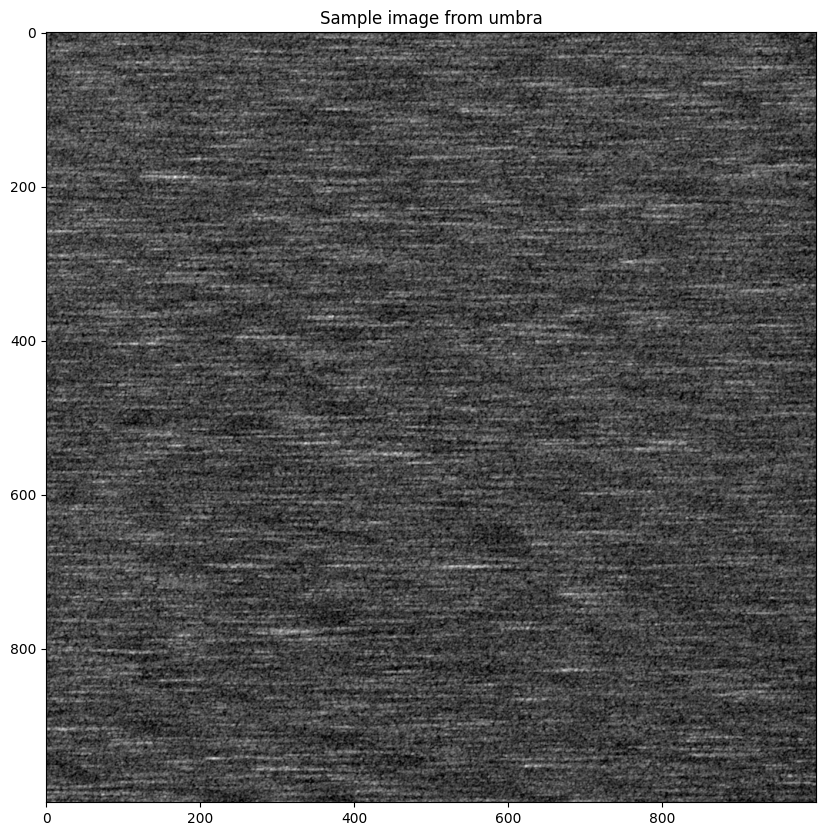

Image Bounds Info (meters): BoundingBox(left=240368.90652513117, bottom=976875.0569791556, right=246023.35858947868, top=982529.4753175286)
Affine Transform Info:
|-0.39, 0.35, 243325.26|
| 0.35, 0.39, 976875.06|
| 0.00, 0.00, 1.00|


Affine(-0.3866030775992002, 0.3528771030534172, 243325.26025953225,
       0.3528771030534097, 0.38660307759920615, 976875.0569791556)

Width of the image: 5654.452064347512 meters,-14625 pixels
Height of the image: 5654.418338372954 meters,-14625 pixels


In [23]:
# View a different sample tif image
sample_tif_img_path = os.path.join(root_dir, "high-res-ship-testing", "2023-08-07-13-53-00_UMBRA-04_GEC.tif")

with rasterio.open(sample_tif_img_path) as vv_src:
    fig, ax = plt.subplots(figsize=(10, 10))
    window = Window(col_off=5000, row_off=5000, width=1000, height=1000)
    subimg = vv_src.read(1, window=window)
    show(subimg, ax=ax, cmap='gray')
    #show(vv_src, ax=ax, cmap='gray')
    print(vv_src.shape)
    plt.title("Sample image from umbra")
    plt.show()

    img_bounds = vv_src.bounds
    print("Image Bounds Info (meters):", img_bounds)
    print("Affine Transform Info:")
    print(vv_src.transform)
    display(vv_src.transform)
    
    # Get the pixel size from the affine transform (10x10 meters in our case)
    pixel_size_x = vv_src.transform[0]  # Pixel size in the x-direction (width)
    pixel_size_y = -vv_src.transform[4]  # Pixel size in the y-direction (height)

    # Calculate the width and height in meters
    width_meters = img_bounds.right - img_bounds.left
    height_meters = img_bounds.top - img_bounds.bottom
    
    # Calculate the number of pixels
    width_pixels = int(width_meters / pixel_size_x)
    height_pixels = int(height_meters / pixel_size_y)
    
    print(f"Width of the image: {width_meters} meters,{width_pixels} pixels")
    print(f"Height of the image: {height_meters} meters,{height_pixels} pixels")

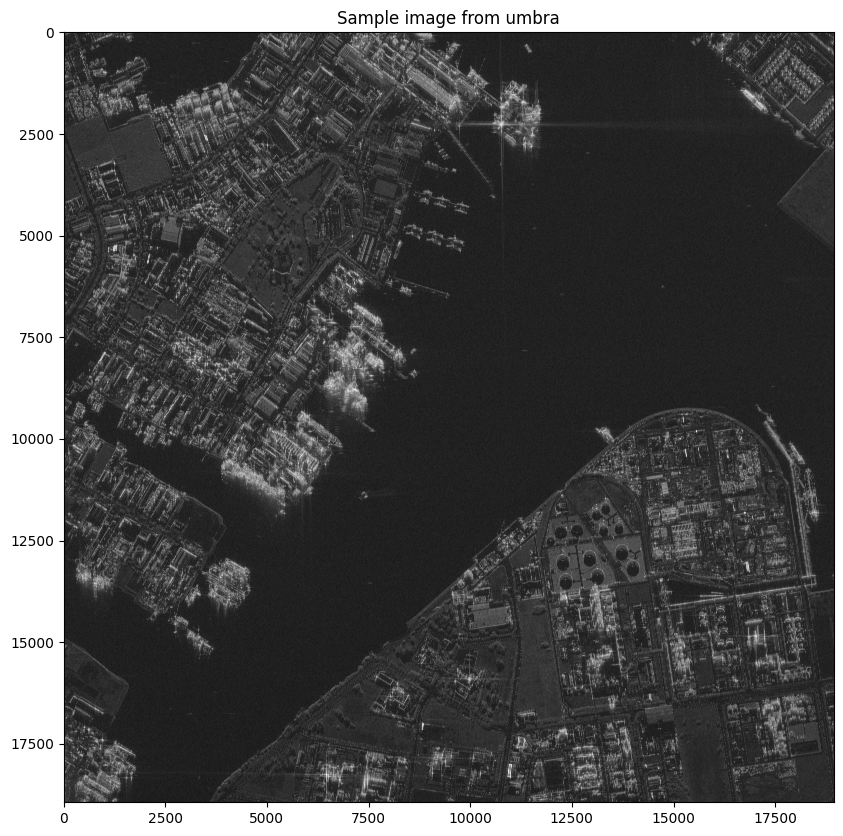

Image Bounds Info (meters): BoundingBox(left=347680.96655421617, bottom=140639.5596371799, right=352471.6855330471, top=145430.27861601085)
Affine Transform Info:
|-0.05,-0.21, 352471.69|
|-0.21, 0.05, 144539.02|
| 0.00, 0.00, 1.00|


Affine(-0.04706196873220975, -0.20590661183759193, 352471.6855330471,
       -0.20590661183759348, 0.04706196873221128, 144539.01905216023)

Width of the image: 4790.718978830904 meters,-101795 pixels
Height of the image: 4790.718978830962 meters,-101795 pixels


In [32]:
# View a different sample tif image
sample_tif_img_path = os.path.join(root_dir, "high-res-ship-testing", "2023-03-25-02-22-27_UMBRA-04_GEC.tif")

with rasterio.open(sample_tif_img_path) as vv_src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(vv_src, ax=ax, cmap='gray', with_bounds=False)
    plt.title("Sample image from umbra")
    plt.show()

    img_bounds = vv_src.bounds
    print("Image Bounds Info (meters):", img_bounds)
    print("Affine Transform Info:")
    print(vv_src.transform)
    display(vv_src.transform)
    
    # Get the pixel size from the affine transform (10x10 meters in our case)
    pixel_size_x = vv_src.transform[0]  # Pixel size in the x-direction (width)
    pixel_size_y = -vv_src.transform[4]  # Pixel size in the y-direction (height)

    # Calculate the width and height in meters
    width_meters = img_bounds.right - img_bounds.left
    height_meters = img_bounds.top - img_bounds.bottom
    
    # Calculate the number of pixels
    width_pixels = int(width_meters / pixel_size_x)
    height_pixels = int(height_meters / pixel_size_y)
    
    print(f"Width of the image: {width_meters} meters,{width_pixels} pixels")
    print(f"Height of the image: {height_meters} meters,{height_pixels} pixels")

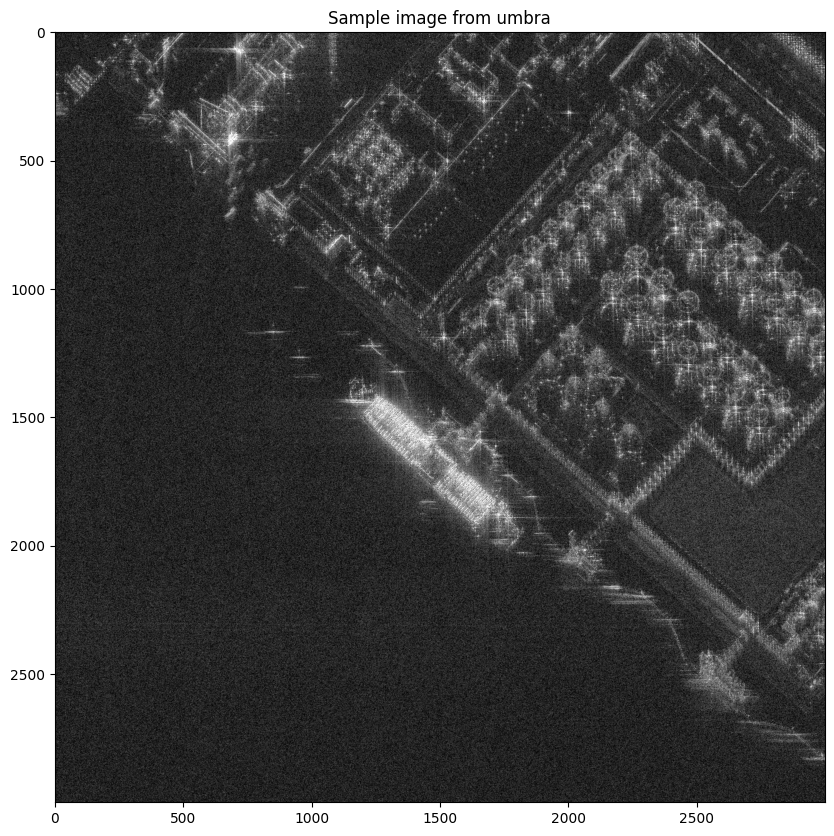

Image Bounds Info (meters): BoundingBox(left=347680.96655421617, bottom=140639.5596371799, right=352471.6855330471, top=145430.27861601085)
Affine Transform Info:
|-0.05,-0.21, 352471.69|
|-0.21, 0.05, 144539.02|
| 0.00, 0.00, 1.00|


Affine(-0.04706196873220975, -0.20590661183759193, 352471.6855330471,
       -0.20590661183759348, 0.04706196873221128, 144539.01905216023)

Width of the image: 4790.718978830904 meters,-101795 pixels
Height of the image: 4790.718978830962 meters,-101795 pixels


In [33]:
# View a different sample tif image (zoom into ship in upper-right corner)
sample_tif_img_path = os.path.join(root_dir, "high-res-ship-testing", "2023-03-25-02-22-27_UMBRA-04_GEC.tif")

with rasterio.open(sample_tif_img_path) as vv_src:
    fig, ax = plt.subplots(figsize=(10, 10))
    window = Window(col_off=15500, row_off=0, width=3000, height=3000)
    subimg = vv_src.read(1, window=window)
    show(subimg, ax=ax, cmap='gray')
    #show(vv_src, ax=ax, cmap='gray', with_bounds=False)
    plt.title("Sample image from umbra")
    plt.show()

    img_bounds = vv_src.bounds
    print("Image Bounds Info (meters):", img_bounds)
    print("Affine Transform Info:")
    print(vv_src.transform)
    display(vv_src.transform)
    
    # Get the pixel size from the affine transform (10x10 meters in our case)
    pixel_size_x = vv_src.transform[0]  # Pixel size in the x-direction (width)
    pixel_size_y = -vv_src.transform[4]  # Pixel size in the y-direction (height)

    # Calculate the width and height in meters
    width_meters = img_bounds.right - img_bounds.left
    height_meters = img_bounds.top - img_bounds.bottom
    
    # Calculate the number of pixels
    width_pixels = int(width_meters / pixel_size_x)
    height_pixels = int(height_meters / pixel_size_y)
    
    print(f"Width of the image: {width_meters} meters,{width_pixels} pixels")
    print(f"Height of the image: {height_meters} meters,{height_pixels} pixels")